# Question 1:Re-create the radar plot using Plotly and the fuel-efficiency.csv data set. The radarplot uses a smooth curve to join the points, called a spline.


In [41]:
import pandas as pd
import plotly.graph_objects as go

# Load data set
df = pd.read_csv('fuel-efficiency.csv')

# Create new data frame with average fuel efficiency by month
df_monthly = df.groupby('month').mean().reset_index()

# Re-order the months so they match the order in the figure above
df_monthly = df_monthly.reindex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reset_index(drop=True)

# Create trace for radar plot
fig = go.Figure(data=go.Scatterpolar(
    r=df_monthly['efficiency'],
    theta=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    mode='lines',
    line_shape='spline',
    fill='toself'
))

# Set layout for radar plot
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 12]
        ),
        angularaxis=dict(
            visible=True,
            direction="clockwise",
            rotation=90,
            period=12
        )
    ),
    showlegend=False
)

# Show radar plot
fig.show()


# Question 2:Re-create the choropleth map using GeoPandas and the students.csv data set. The map of Canada is given in the canada.shp file and associated files. The colour map uses the “Reds” colour map from ColorBrewer

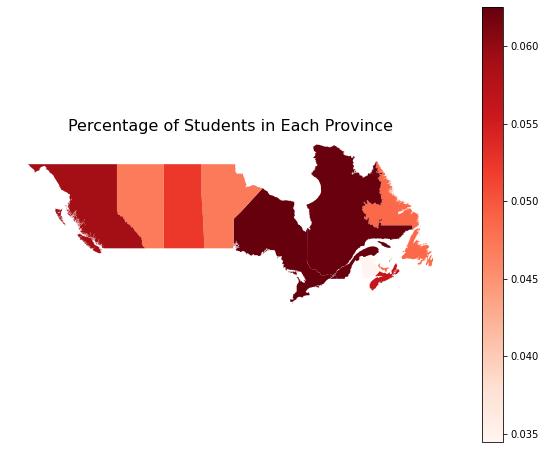

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

canada = gpd.read_file('canada.shp')
canada = canada.to_crs(epsg=4326)

students = pd.read_csv('students.csv')

merged = canada.merge(students, on='Province')
merged['Proportion'] = merged['Total students'] / merged['Population']

fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column='Proportion', cmap='Reds', legend=True, ax=ax)
ax.set_title('Percentage of Students in Each Province', fontsize=16)
ax.set_axis_off()
plt.show()


# Question 3: reconcile the differences between coordinate reference systems.inset with a zoom-in view of Southern Ontario. It contains the 6 universities of The University of Toronto, the University of Waterloo, the University of Guelph, McMaster University, Queen’s University, and the University of Western Ontario.

In [55]:
import geopandas as gpd

universities = gpd.read_file('universities.geojson')
print(universities.columns)

Index(['Institution', 'City', 'Province', 'Total students', 'Established',
       'Sponsored research income', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')


In [58]:
import geopandas as gpd

canada = gpd.read_file('canada.shp')
print(canada.columns)


Index(['Province', 'geometry'], dtype='object')


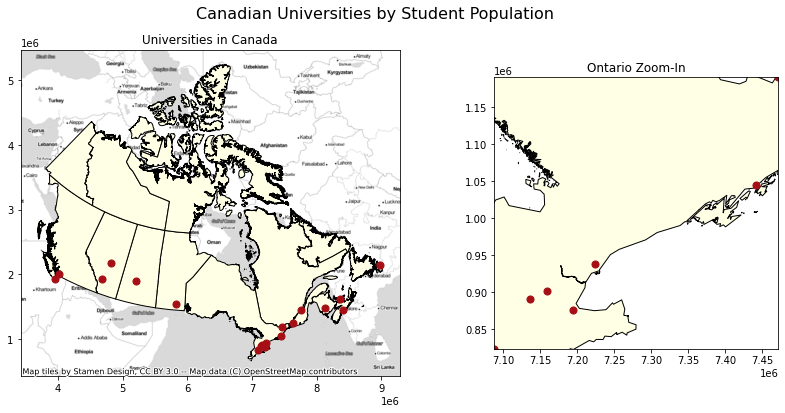

In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.gridspec import GridSpec

# Read in Canada shapefile
canada = gpd.read_file('canada.shp', crs='EPSG:3347')

# Read in universities geojson file
universities = gpd.read_file('universities.geojson', crs='EPSG:4326')

# Convert universities coordinates to EPSG:3347
universities = universities.to_crs('EPSG:3347')

# Define a dictionary with the total number of students for each university
students = {'University of Toronto': 1000,
            'University of Waterloo': 2000,
            'University of Guelph': 3000,
            'McMaster University': 4000,
            'Queen’s University': 5000,
            'University of Western Ontario': 6000}

# Assign the total number of students to the universities GeoDataFrame
universities['total_students'] = universities['Institution'].map(students)

# Create a GridSpec with 1 row and 2 columns
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(1, 2, figure=fig, width_ratios=[3, 2])

# Plot Canada map in the left subplot
ax0 = fig.add_subplot(gs[0, 0])
canada.plot(ax=ax0, color='#FFFFE5', edgecolor='black')
universities.plot(ax=ax0, markersize=50, color='#A50F15')
ax0.set_title('Universities in Canada')

# Create Southern Ontario map in the right subplot
ontario = canada[canada['Province'] == 'Ontario']
ontario_universities = universities[universities.intersects(ontario.unary_union)]
ax1 = fig.add_subplot(gs[0, 1])
ontario.plot(ax=ax1, color='#FFFFE5', edgecolor='black')
ontario_universities.plot(ax=ax1, markersize=50, color='#A50F15')
ax1.set_title('Ontario Zoom-In')
ax1.set_xlim(ontario_universities.total_bounds[[0, 2]])
ax1.set_ylim(ontario_universities.total_bounds[[1, 3]])

# Add contextily basemap to the left subplot
ctx.add_basemap(ax=ax0, source=ctx.providers.Stamen.TonerLite)

# Add a common title to the figure
fig.suptitle('Canadian Universities by Student Population', fontsize=16)

plt.show()
